In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline


In [78]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [79]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [81]:
team_1 = 'Kolkata Knight Riders'
team_2 = 'Kings XI Punjab'

# Winning Probability of Teams

Text(0.5, 1.0, 'KXIP Total Runs Score Stats Per Count')

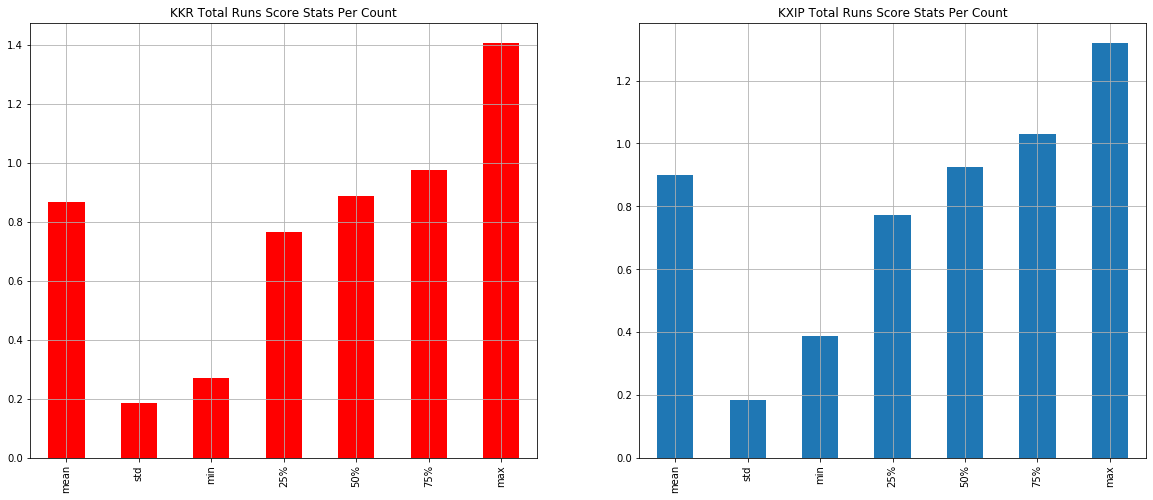

In [82]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
kkr_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
k11p_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(kkr_runs.describe()[1:]/kkr_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True, color='red')
(k11p_runs.describe()[1:]/k11p_runs.describe()[0]).plot(ax=ax[1], kind='bar', grid=True)
ax[0].set_title("KKR Total Runs Score Stats Per Count")
ax[1].set_title("KXIP Total Runs Score Stats Per Count")

Text(0.5, 1.0, 'Percentage of Winning')

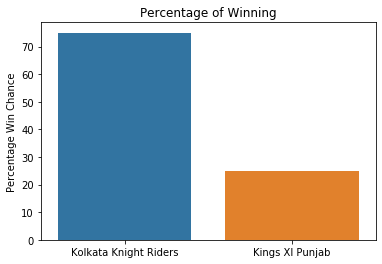

In [83]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [84]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

In [85]:
kkr = ['S Gill', 'N Rana', 'RA Tripathi', 'KD Karthik', 'SP Narine', 'EJG Morgan', 'PJ Cummins', 'LH Ferguson', 'P Krishna', 'V Chakravarthy']
kxip = ['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N Pooran', 'GJ Maxwell', 'DJ Hooda', 'CJ Jordan', 'M Ashwin', 'Mohammed Shami']

# Dot Balls

In [86]:
dot_balls = list()
for bowler in (['PJ Cummins', 'LH Ferguson', 'P Krishna', 'V Chakravarthy', 'SP Narine', 'GJ Maxwell', 'DJ Hooda', 'CJ Jordan', 'M Ashwin', 'Mohammed Shami']):
    for match_id in delivery[(delivery['bowler']==bowler)]['match_id'].unique():
        dot_ball = len(delivery[(delivery['bowler']==bowler) & (delivery['match_id']==match_id) & (delivery['total_runs']==0)])
        dot_balls.append([bowler, dot_ball])
        

In [87]:
dots = pd.DataFrame(data=dot_balls, columns=['Bowler', 'Dot Balls'])
dots.groupby('Bowler').mean()
print("Total Dot Balls will be around:", int(sum(dots.groupby('Bowler').mean()['Dot Balls'])))

Total Dot Balls will be around: 66


# Wickets fall after 15th over

Text(0.5, 1.0, 'KXIP wickets fall in death overs Histogram')

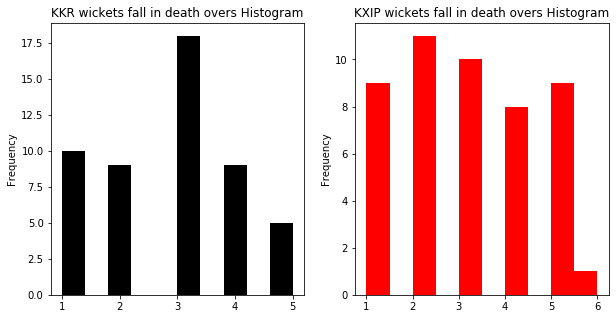

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
delivery[(delivery['batting_team']==team_1) & (delivery['over']>=15) & (delivery['player_dismissed']==1)].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[0], kind='hist', color='black')
delivery[(delivery['batting_team']==team_2) & (delivery['over']>=15) & (delivery['player_dismissed']==1)].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[1], kind='hist', color='red')
ax[0].set_title("KKR wickets fall in death overs Histogram")
ax[1].set_title("KXIP wickets fall in death overs Histogram")

In [89]:
print(" So, the range of total wickets falls in death oovers will be around:", 3+2)

 So, the range of total wickets falls in death oovers will be around: 5


# Maxwell contribution

In [90]:
maxwell_contri = list()
for match_id in delivery[(delivery['batsman']=='GJ Maxwell')]['match_id'].unique():
    runs = sum(delivery[(delivery['batsman']=='GJ Maxwell') & (delivery['match_id']==match_id)]['batsman_runs'])
    team = delivery[(delivery['batsman']=='GJ Maxwell') & (delivery['match_id']==match_id)]['batting_team'].unique()[0]
    tot_run = sum(delivery[(delivery['match_id']==match_id) & (delivery['batting_team']==team)]['batsman_runs'])
    
    pct_contri = runs*100/tot_run
    maxwell_contri.append([match_id, pct_contri])
    


Text(0.5, 1.0, 'Maxweel Pct Contribution Histogram')

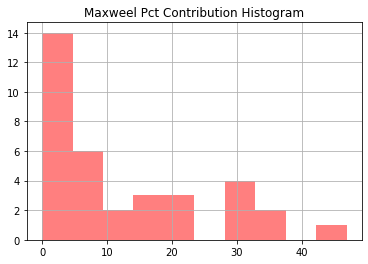

In [91]:
maxwell = pd.DataFrame(data=maxwell_contri, columns=['Match_id', 'Pct Conribution'])
maxwell['Pct Conribution'].hist(color='red', alpha=0.5)
plt.title("Maxweel Pct Contribution Histogram")

# No balls 

Text(0.5, 1.0, 'No of no-balls delivered by the today playing XI squad bowlers during 2016-2019')

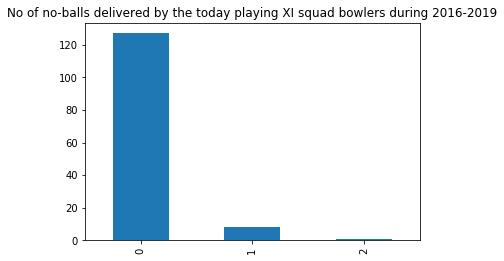

In [92]:
delivery[delivery['bowler'].isin(['PJ Cummins', 'LH Ferguson', 'P Krishna', 'V Chakravarthy', 'SP Narine', 'GJ Maxwell', 'DJ Hooda', 'CJ Jordan', 'M Ashwin', 'Mohammed Shami'])].groupby('match_id').sum()['noball_runs'].value_counts().plot(kind='bar')
plt.title("No of no-balls delivered by the today playing XI squad bowlers during 2016-2019")

# Summary

- Winning probabilities was calculated and compared with central tendency measure and using winner columns number of matches were compared to find percentage winning chances. 
- The number of dot balls per match was calculated for each of the predicted bowlers playing today, and summed together to find out the value that lies in given range. 
- Histogram of number of wickets fall during death overs for both the teams per match was graphed and then the highest frequency value of both teams were summed to take out the number of wickets fall. 
- Maxwell contribution for each of his match was calculated by calculating his runs and teams run of that match and dividing it and multiplying it with 100. Using the histogram, the range was predicted.
- Mean value for the number of no-balls per match for each bowler was calculated which showed that the chances of getting 0 to 1 no balls range is high.